In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import sqlite3

In [2]:
df = pd.read_csv('students.csv')

In [14]:
df

stud.id                 name  gender  age  height  weight    religion  \
1      833917  Gonzales, Christina  Female   19     160    64.8      Muslim   
2      898539       Lozano, T'Hani  Female   19     172    73.0       Other   
3      379678       Williams, Hanh  Female   22     168    70.6  Protestant   
4      807564          Nem, Denzel    Male   19     183    79.7       Other   
5      383291      Powell, Heather  Female   21     175    71.4    Catholic   
...       ...                  ...     ...  ...     ...     ...         ...   
8235   818044          Her, Joshua    Male   22     181    79.1  Protestant   
8236   560166           Reid, Jose    Male   23     178    72.6    Catholic   
8237   380174     Villa, Raechelle  Female   20     169    67.7       Other   
8238   540967         Ngo, Preston    Male   23     195    98.6       Other   
8239   413207     Bernhard, Estela  Female   19     170    69.0      Muslim   

      nc.score semester                   major                       minor  \
1         1.91      1st       Political Science             Social Sciences   
2         1.56      2nd         Social Sciences  Mathematics and Statistics   
3         1.24      3rd         Social Sciences  Mathematics and Statistics   
4         1.37      2nd  Environmental Sciences  Mathematics and Statistics   
5         1.46      1st  Environmental Sciences  Mathematics and Statistics   
...        ...      ...                     ...                         ...   
8235      2.91      6th  Environmental Sciences             Social Sciences   
8236      2.03      2nd  Environmental Sciences  Mathematics and Statistics   
8237      3.72      3rd  Environmental Sciences       Economics and Finance   
8238      2.74      4th         Social Sciences           Political Science   
8239      3.29     >6th       Political Science                     Biology   

      score1  score2  online.tutorial  graduated        salary  
1        NaN     NaN                0          0           NaN  
2        NaN     NaN                0          0           NaN  
3       45.0    46.0                0          0           NaN  
4        NaN     NaN                0          0           NaN  
5        NaN     NaN                0          0           NaN  
...      ...     ...              ...        ...           ...  
8235    73.0    71.0                0          1  36750.087135  
8236     NaN     NaN                0          0           NaN  
8237    77.0    75.0                1          0           NaN  
8238    50.0    46.0                1          1  40112.041834  
8239    47.0    59.0                1          1  45900.134459  

[8239 rows x 16 columns]

In [5]:
data = df.height

<AxesSubplot:>

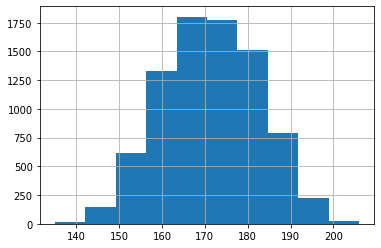

In [6]:
data.hist()

<AxesSubplot:xlabel='height', ylabel='Count'>

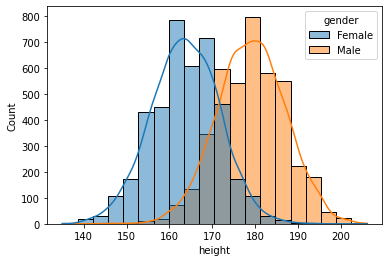

In [10]:
sns.histplot(data=df, x="height", bins=20, hue='gender', kde=True)

In [ ]:
sns.pairplot(df)

In [13]:
df.groupby('gender').count()

stud.id  name   age  height  weight  religion  nc.score  semester  \
gender                                                                      
Female     4110  4110  4110    4110    4110      4110      4110      4110   
Male       4129  4129  4129    4129    4129      4129      4129      4129   

        major  minor  score1  score2  online.tutorial  graduated  salary  
gender                                                                    
Female   4110   4110    2266    2266             4110       4110     674  
Male     4129   4129    2626    2626             4129       4129    1079

In [55]:
sql_agg = """
SELECT gender AS gender,
       sum(salary) AS "SUM(salary)",
       AVG(age) AS "Средний(возраст)",
       COUNT(*) AS "COUNT(*)",
       count(salary) AS "COUNT(salary)",
       min(height) AS "MIN(height)",
       max(weight) AS "MAX(weight)",
       count(DISTINCT religion) AS "COUNT_DISTINCT(religion)"
FROM students
GROUP BY gender
ORDER BY "SUM(salary)" DESC
"""

In [46]:
connector = sqlite3.connect('class.db')

In [47]:
cursor = connector.cursor()

In [27]:
sql = """
CREATE TABLE test_table (
    pk INTEGER PRIMARY KEY,
    name TEXT,
    age INTEGER,
    salary NUMERIC
)
"""

In [28]:
cursor.execute(sql)

In [29]:
connector.commit()

In [30]:
records = [
     [1, 'Alice', 23, 23566],
     [2, 'Bob', 34, 3444],
     [3, 'Mike', 56, 123566],
]

In [33]:
for record in records:
    sql = f"""
    INSERT INTO test_table (
        name,
        age,
        salary
    ) VALUES (
        '{record[1]}',
        {record[2]},
        {record[3]}
    )
    """
    cursor.execute(sql)

In [37]:
sql = """
SELECT * 
FROM test_table
"""
cursor.execute(sql)

In [38]:
cursor.fetchone()

(1, 'Alice', 23, 23566)

In [39]:
cursor.fetchone()

(2, 'Bob', 34, 3444)

In [40]:
cursor.fetchone()

(3, 'Mike', 56, 123566)

In [41]:
cursor.fetchone()

In [35]:
cursor.fetchall()

[(1, 'Alice', 23, 23566), (2, 'Bob', 34, 3444), (3, 'Mike', 56, 123566)]

In [36]:
cursor.fetchall()

[]

In [42]:
connector.commit()

In [17]:
#conn.close()

In [45]:
df.to_sql('students', connector)

8239

In [48]:
connector

In [56]:
print(sql_agg)


SELECT gender AS gender,
       sum(salary) AS "SUM(salary)",
       AVG(age) AS "Средний(возраст)",
       COUNT(*) AS "COUNT(*)",
       count(salary) AS "COUNT(salary)",
       min(height) AS "MIN(height)",
       max(weight) AS "MAX(weight)",
       count(DISTINCT religion) AS "COUNT_DISTINCT(religion)"
FROM students
GROUP BY gender
ORDER BY "SUM(salary)" DESC



In [57]:
cursor.execute(sql_agg)

In [58]:
for row in cursor:
    print(row)

('Male', 50264819.84769778, 22.476628723661904, 4129, 1079, 144, 116.0, 5)
('Female', 24276443.12678824, 22.606812652068125, 4110, 674, 135, 93.8, 5)


In [62]:
cursor.description

(('gender', None, None, None, None, None, None),
 ('SUM(salary)', None, None, None, None, None, None),
 ('Средний(возраст)', None, None, None, None, None, None),
 ('COUNT(*)', None, None, None, None, None, None),
 ('COUNT(salary)', None, None, None, None, None, None),
 ('MIN(height)', None, None, None, None, None, None),
 ('MAX(weight)', None, None, None, None, None, None),
 ('COUNT_DISTINCT(religion)', None, None, None, None, None, None))

In [ ]:
columns = typ

In [61]:
df.groupby('gender').count()

stud.id  name   age  height  weight  religion  nc.score  semester  \
gender                                                                      
Female     4110  4110  4110    4110    4110      4110      4110      4110   
Male       4129  4129  4129    4129    4129      4129      4129      4129   

        major  minor  score1  score2  online.tutorial  graduated  salary  
gender                                                                    
Female   4110   4110    2266    2266             4110       4110     674  
Male     4129   4129    2626    2626             4129       4129    1079